# CALIDAD DE DATOS

<h1>Archivo : Censo_2022_internet_vivienda_particular_provincia.csv</h1> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
# cargamos el archivo
df = pd.read_csv(r'..\CSV\Censo_2022_internet_vivienda_particular_provincia.csv', sep=',', encoding='ANSI')

In [3]:
# vemos la primer linea para identificar columna y datos
df.head(1)

,año,Trimestre,Provincia,ADSL,Cablemodem,Fibra optica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326,3,1,130,72,532


In [148]:
# obtenemos la info del datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AÃ±o        504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    505 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    o

<h2>Normalizacion de los datos</h2>

Normalizamos el nombre de las columnas

In [153]:
df.columns

Index(['aã±o', 'trimestre', 'provincia', 'otros', '0,256_mbps', '0,375_mbps',
       '0,625_mbps', '0,5_mbps', '0,512_mbps', '0,75_mbps', '1_mbps',
       '1,2_mbps', '1,25_mbps', '1,5_mbps', '2_mbps', '2,2_mbps', '2,5_mbps',
       '6,7_mbps', '3_mbps', '3,2_mbps', '3,3_mbps', '3,5_mbps', '4_mbps',
       '4,5_mbps', '5_mbps', '6_mbps', '6,4_mbps', '7_mbps', '7,5_mbps',
       '8_mbps', '9_mbps', '10_mbps', '10,2_mbps', '10,6_mbps', '11_mbps',
       '12_mbps', '12,3_mbps', '13_mbps', '14_mbps', '15_mbps', '16_mbps',
       '17_mbps', '18_mbps', '19_mbps', '20_mbps', '20,5_mbps', '21_mbps',
       '22_mbps', '23_mbps', '24_mbps', '25_mbps', '25,1_mbps', '25,11_mbps',
       '25,5_mbps', '26_mbps', '27_mbps', '28_mbps', '29_mbps', '30_mbps',
       '31_mbps', '32_mbps', '34_mbps', '35_mbps', '36_mbps', '37_mbps',
       '38_mbps', '39_mbps', '40_mbps', '41_mbps', '45_mbps', '46_mbps',
       '47_mbps', '48_mbps', '49_mbps', '50_mbps', '50,1_mbps', '51_mbps',
       '50,25_mbps', '52_mb

In [150]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [151]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '_')

In [157]:
df = df.rename(columns={'aã±o':'año'})

In [158]:
df.head(3)

,año,trimestre,provincia,otros,"0,256_mbps","0,375_mbps","0,625_mbps","0,5_mbps","0,512_mbps","0,75_mbps",...,63_mbps,64_mbps,65_mbps,66_mbps,67_mbps,68_mbps,70_mbps,71_mbps,75_mbps,77_mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,...,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0
1,2022.0,4.0,Capital Federal,106.772,31,- 0,- 0,451.000,34,1.307,...,- 0,- 0,- 0,1,- 0,- 0,15,- 0,28.406,- 0
2,2022.0,4.0,Catamarca,2.280,- 0,- 0,- 0,34.000,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


Verificamos que los valores de la columna total corresponde a la suma de las columnas de los rangos de velocidades y no existen valores erroneos

In [124]:
#creamos una columna con la suma de todos los valores excluido total
df['total1'] = df['adsl'] + df['cablemodem']+ df['fibra_optica']+ df['wireless']+ df['otros']
# creamos una columna con el valor de la diferencia entre el total del datasets y el creado para control
df['diferencia'] = df['total'] - df['total1']
#Verificamos que no existen diferencias
df['diferencia'].unique()

array([0], dtype=int64)

Eliminamos la columna total por ser recurrente a la suma de todas las otras columnas<br>

Eliminamos tambian las columnas creadas para el analisis

In [125]:
# Eliminar las columnas innecesarias
columnas_a_eliminar = ['total', 'diferencia', 'total1']
df = df.drop(columns=columnas_a_eliminar)

In [126]:
df.describe()

,año,trimestre,adsl,cablemodem,fibra_optica,wireless,otros
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,86.363426,103.291667,165.432870,57.777778,102.712963
std,2.583484,1.118682,116.431490,188.849172,266.807807,156.015038,207.418981
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.000000,1.750000,21.000000,9.000000,9.000000,4.000000,3.000000
50%,2018.000000,2.500000,46.000000,35.500000,25.000000,10.000000,15.000000
75%,2020.000000,3.250000,81.000000,72.250000,170.750000,26.000000,47.000000
max,2022.000000,4.000000,720.000000,999.000000,998.000000,952.000000,987.000000


Verificamos la existencia de registros duplicados

In [127]:
# verificamos la existencia de registros duplicados
duplicados_df = df[df.duplicated()]
duplicados_df

,año,trimestre,provincia,adsl,cablemodem,fibra_optica,wireless,otros


Verificamos la existencia de valores nulos

In [128]:
# Buscar los valores NaN en la columna 'mi_columna'
valores_nulos = df.isnull().sum()
# Contar valores nulos por columna
valores_nulos

año             0
trimestre       0
provincia       0
adsl            0
cablemodem      0
fibra_optica    0
wireless        0
otros           0
dtype: int64

In [129]:
# Crear una nueva columna "fecha" combinando las columnas "dia", "trimestre" y "año"
df['fecha'] = pd.to_datetime(df['año'].astype(str) + '-' + (df['trimestre']*3).astype(str) + '-' + '1', format='%Y-%m-%d')

<h2>Determinacion de valores outliers</h2>

<h3>Creamos las siguientes funciones para agilizar el analisis:</h3>


- ***graficar_box*** :          para hacer un grafico boxplot de las columnas indicadas<br>
- ***graficar_lin*** :          para hacer un grafico de lineas de las columnas indicadas<br>
- ***identificar_outliers***.   para realizar el calculo matematico de determinacion de valores outliers<br>
- ***reemplazar_outliers*** :   para realizar el reemplazo de/los valores aoutliers por la media de la columna


In [130]:
def graficar_box(data, columna):
    

    # Crear y mostrar boxplots solo para las columnas de interés
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data[columna], orient='h')
    plt.title('Visualización de valores atípicos')
    plt.show()
    return

In [131]:
def graficar_lin(data, columna):
    # Graficar la variable en un gráfico de barras en función del tiempo
    plt.figure(figsize=(10, 5))
    plt.plot(data['fecha'], data[columna], label= columna, marker='o', linestyle='-', color='blue')

    plt.title('Gráfico de Barras de Variable en Función del Tiempo')
    plt.xlabel('fecha')
    plt.ylabel('Velocidades de conexion')
    plt.grid(True)
    plt.legend()

    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()
    return

In [132]:
def identificar_outliers(data, columna):
    """
    Identifica valores atípicos (outliers) en una columna específica de un DataFrame.

    Parameters:
        - data: DataFrame que contiene los datos.
        - columna: Nombre de la columna a verificar para outliers.

    Returns:
        - outliers: DataFrame con los valores atípicos encontrados.
    """

    # Calcular la media y la desviación estándar de la columna
    mean = data[columna].mean()
    std_dev = data[columna].std()

    # Definir un umbral (por ejemplo, 3 veces la desviación estándar)
    threshold = 3 * std_dev

    # Identificar valores que superen el umbral y almacenarlos en una lista
    outliers = data[(data[columna] > (mean + threshold)) | (data[columna] < (mean - threshold))][columna].tolist()


    return outliers

In [133]:
def reemplazar_outliers(data, columna, lista):
    # Calcular la media'
    media = df[columna].mean()
    # Buscar los valores y asignarles el valor promedio si se encuentran
    for valor in lista:
        fila_indice = data.index[data[columna] == valor].tolist()
        if fila_indice:
            data.loc[fila_indice, columna] = media
    return

In [134]:
def corregir_outliers(df, lista_valores, col_veloc):
        
    for valor in lista_valores:
        df_x = df[df['provincia']== valor]
        
        for col in col_veloc:
            lista = identificar_outliers(df_x, col)
            #corregir_outliers(df, valor, lista)

Realizamos el analisis del datasets completo

In [135]:
df.columns

Index(['año', 'trimestre', 'provincia', 'adsl', 'cablemodem', 'fibra_optica',
       'wireless', 'otros', 'fecha'],
      dtype='object')

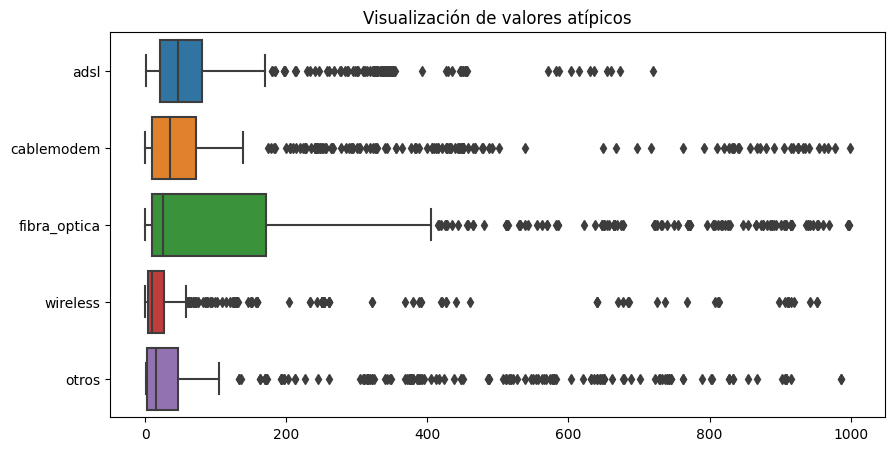

In [136]:
columnas_interesantes = ['adsl', 'cablemodem', 'fibra_optica', 'wireless','otros']
graficar_box(df, columnas_interesantes)

<h2> ******************************************************************************************************************************</h2>

In [137]:
provincias = df['provincia'].unique().tolist()

<h3>Analisis y Tratamiento de valores de columna 'fibra_óptica' </h3>

- Identificamos los valores atipicos

In [138]:
lista = identificar_outliers(df, 'fibra_optica')
print(lista)

[969, 998, 998, 997, 997]


Realizamos el boxplot

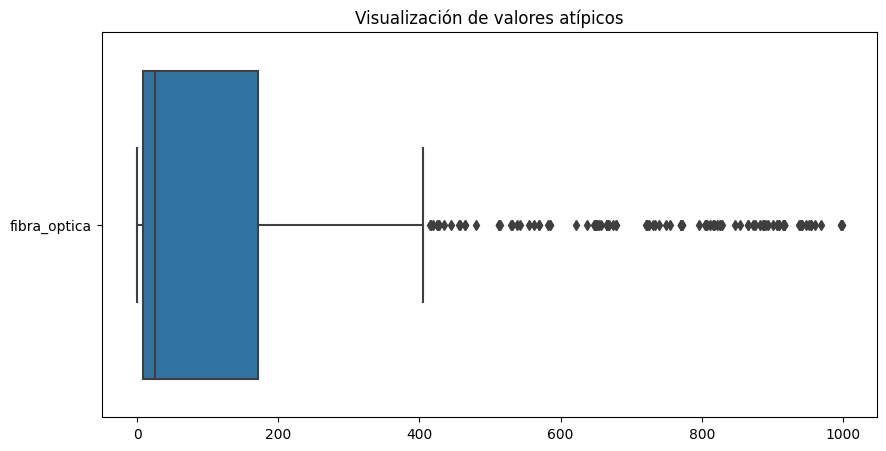

In [139]:
columnas_interesantes = ['fibra_optica']
graficar_box(df, columnas_interesantes)

Realizamos el grafico de linea para analizar la secuencia de los datos

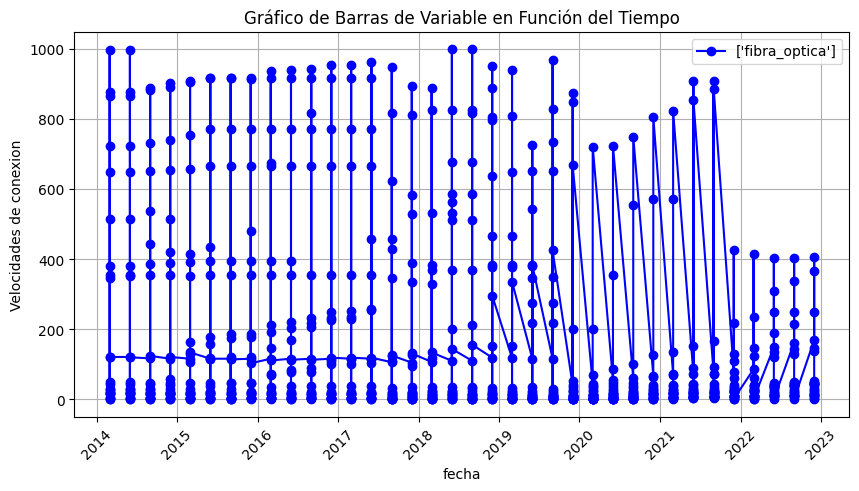

In [140]:
columnas_interesantes = ['fibra_optica']
graficar_lin(df, columnas_interesantes)

In [142]:
fibra = df[['fibra_optica','fecha']]
fibra

,fibra_optica,fecha
0,1,2022-12-01
1,139,2022-12-01
2,47,2022-12-01
3,47,2022-12-01
4,10,2022-12-01
...,...,...
859,381,2014-03-01
860,3,2014-03-01
861,19,2014-03-01
862,648,2014-03-01


Realizamos el reemplazo de los valores outliers por la media de la columna

In [ ]:
outliers_a_remmplazar = lista
columnas_interesantes = 'hasta_512_kbps'
reemplazar_outliers(df,columnas_interesantes, outliers_a_remmplazar)

Verificamos el cambio

In [ ]:
columnas_interesantes = ['hasta_512_kbps']

In [ ]:
graficar_lin(df, columnas_interesantes)
graficar_box(df, columnas_interesantes)

In [ ]:
identificar_outliers(df, 'hasta_512_kbps')

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_1_mbps_y_6_mbps' </h3>

In [ ]:
lista =identificar_outliers(df,'entre_1_mbps_y_6_mbps')
print(lista)

Graficamos

In [ ]:
columnas_interesantes = 'entre_1_mbps_y_6_mbps'
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

In [ ]:
outliers_a_remmplazar = lista
columnas_interesantes = 'entre_1_mbps_y_6_mbps'
reemplazar_outliers(df,columnas_interesantes, outliers_a_remmplazar)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_10_mbps_y_20_mbps' </h3>

In [ ]:
columnas_interesantes = 'entre_10_mbps_y_20_mbps'
identificar_outliers(df, columnas_interesantes)

In [ ]:
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_20_mbps_y_30_mbps' </h3>

In [ ]:
columnas_interesantes = 'entre_20_mbps_y_30_mbps'
identificar_outliers(df, columnas_interesantes)

In [ ]:
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h1>Realizamos un grafico comparativo de todas las variables en funcion del tiempo por provincia

In [ ]:
# Obtener los valores únicos de 'columna1' y almacenarlos en una lista
valor_columna = df['provincia'].unique().tolist()

In [ ]:
a_evaluar = ['adsl', 'cablemodem', 'fibra_optica', 'wireless','otros']

In [ ]:
def graficar_columnas_en_funcion_del_tiempo(df, lista_valores, col_veloc):
    """
    Grafica varias columnas en un gráfico de líneas en función del tiempo.

    Parameters:
        - df: DataFrame que contiene los datos.
        - columnas: Lista de nombres de columnas a graficar.
        - fecha_column: Nombre de la columna que contiene las fechas.

    Returns:
        None
    """
    
    
    
    for valor in lista_valores:
        plt.figure(figsize=(20, 6))
        df_x = df[df['provincia']== valor]
        
        for col in col_veloc:
            color = 'C' + str(col_veloc.index(col))  # Asigna un color a cada columna
            plt.plot(df_x['fecha'], df_x[col], label=f'{col} ({valor})', marker='o', linestyle='-', color=color)
        plt.title('Gráfico de Líneas de Variables en Función del Tiempo')
        plt.xlabel('fecha')
        plt.ylabel(valor)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize='small')
        # Rotar las etiquetas del eje x para una mejor legibilidad
        plt.xticks(rotation=45)
        # Mostrar el gráfico
        plt.show()

    


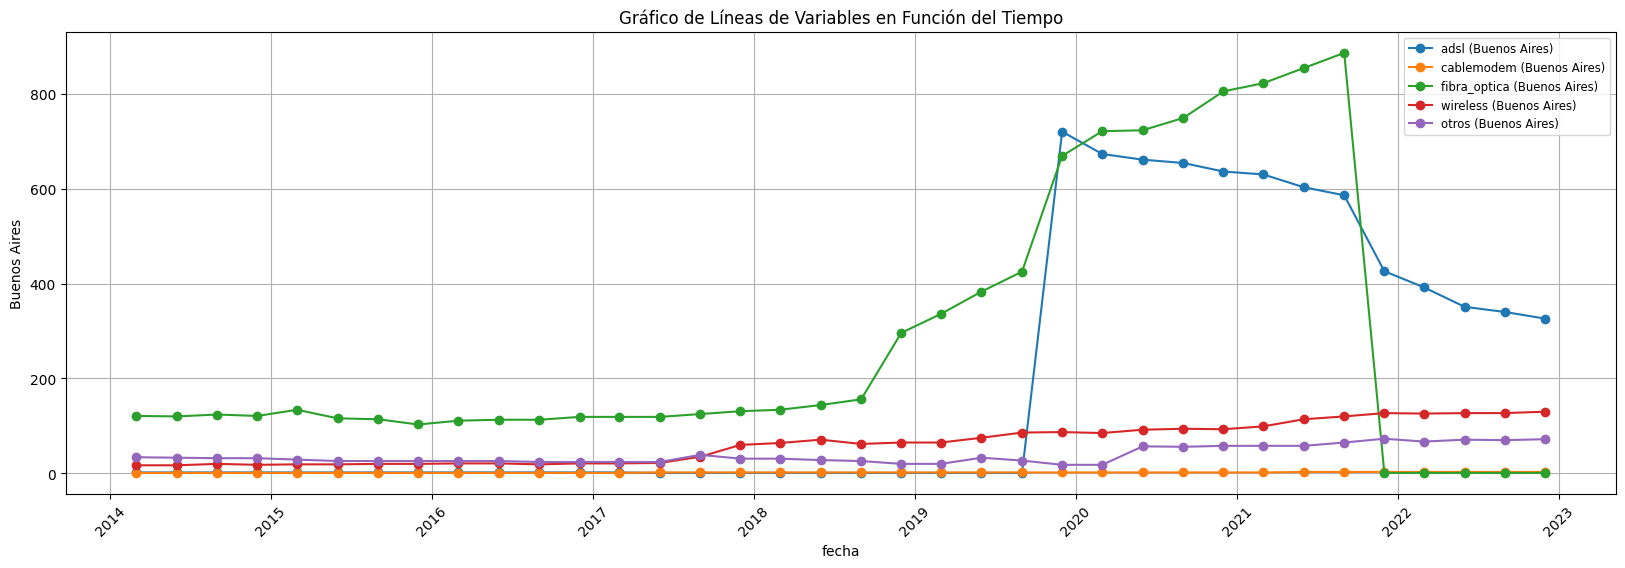

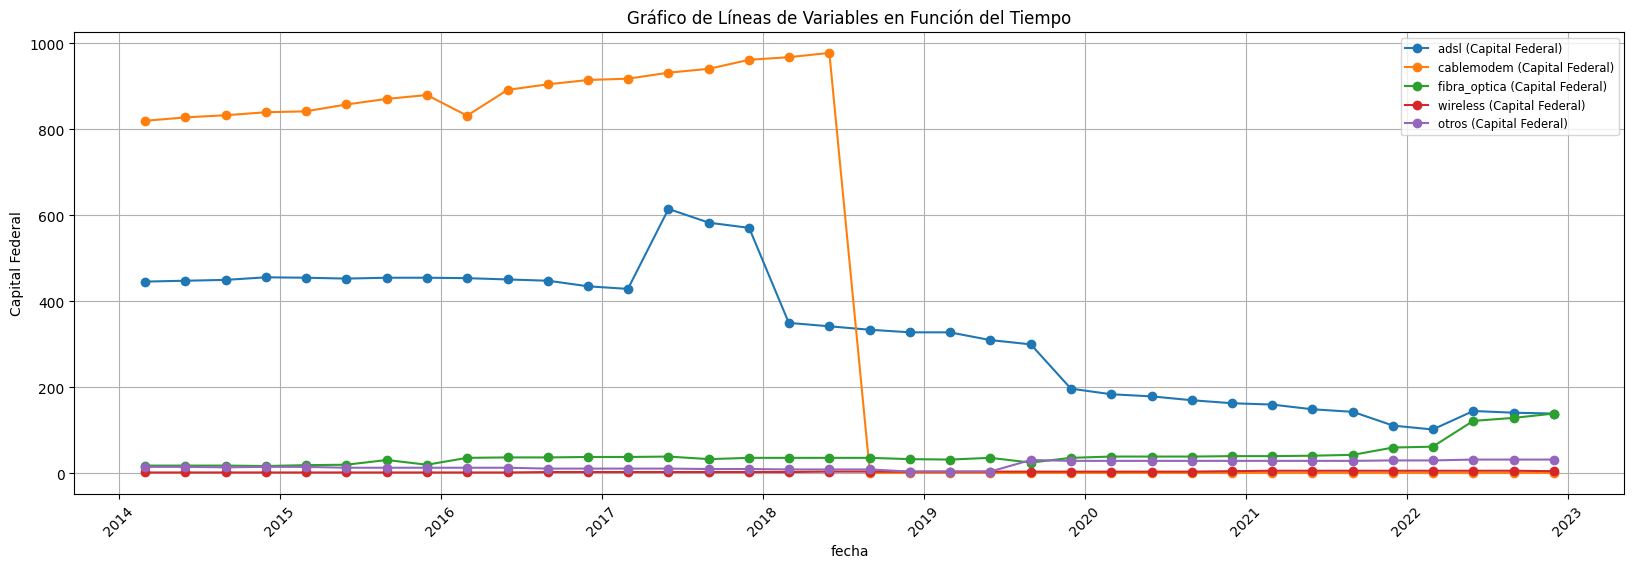

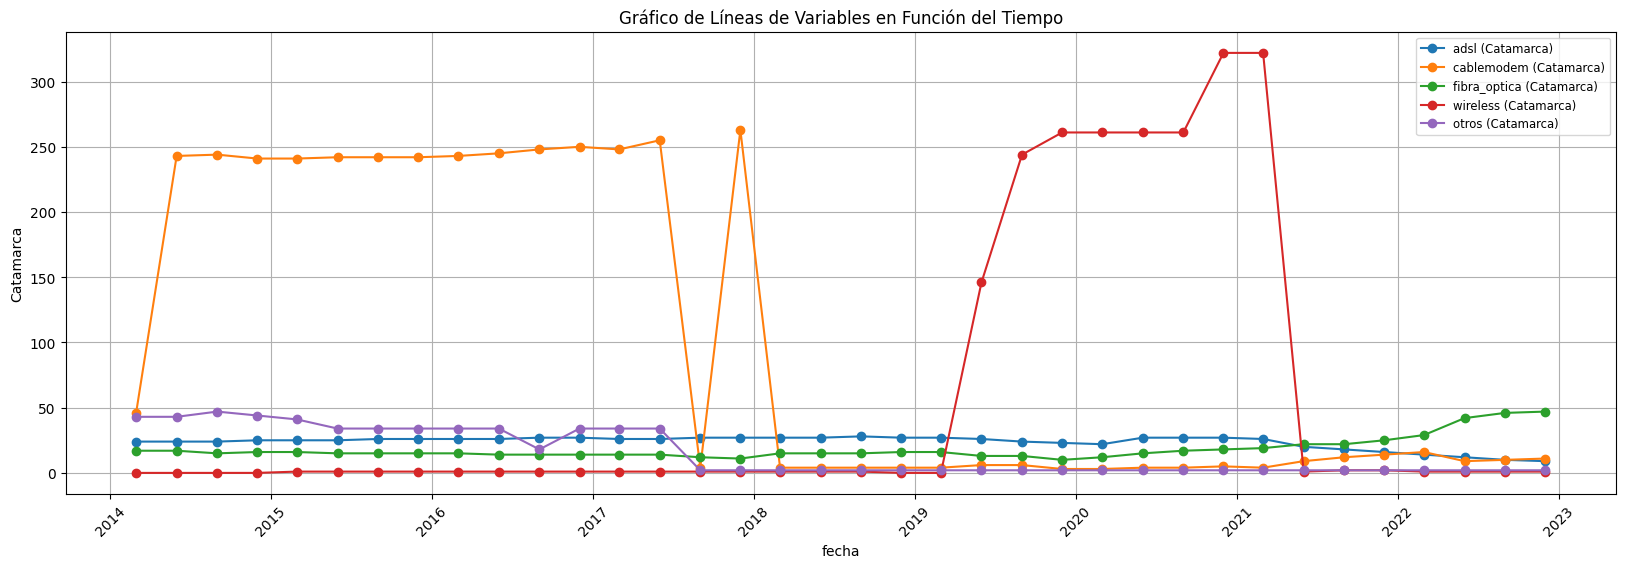

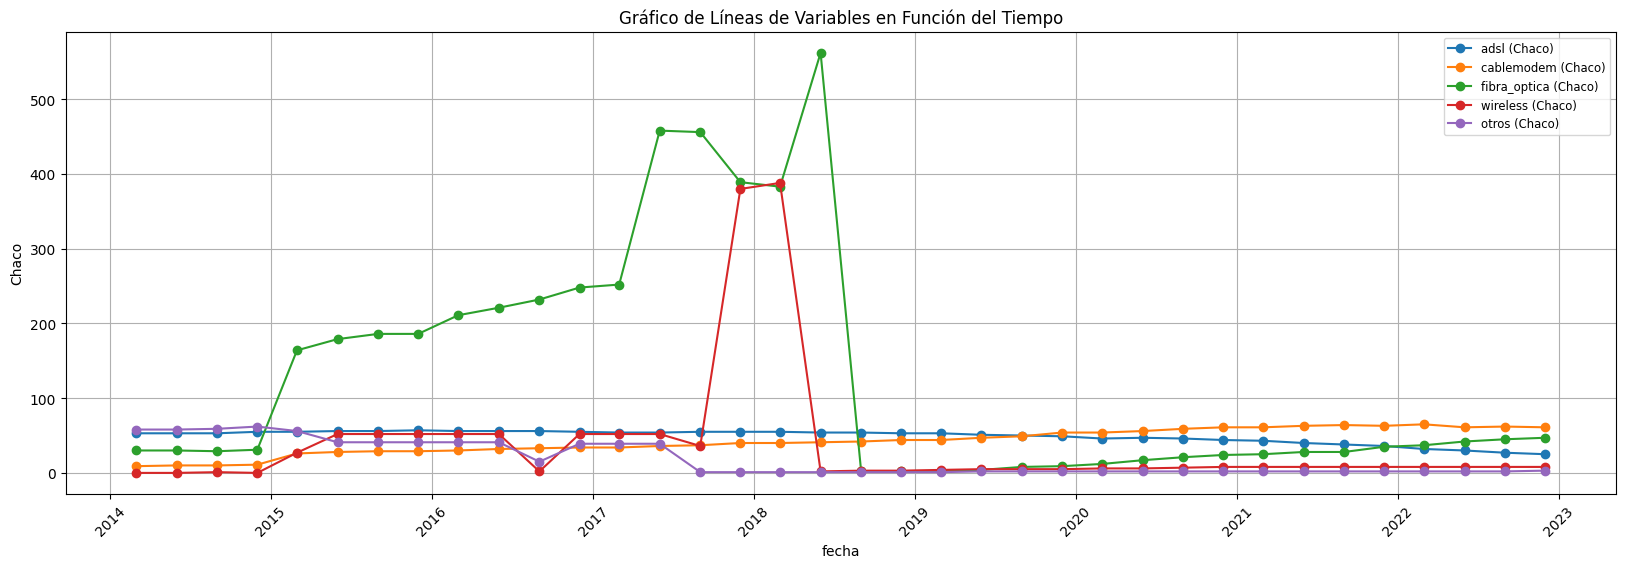

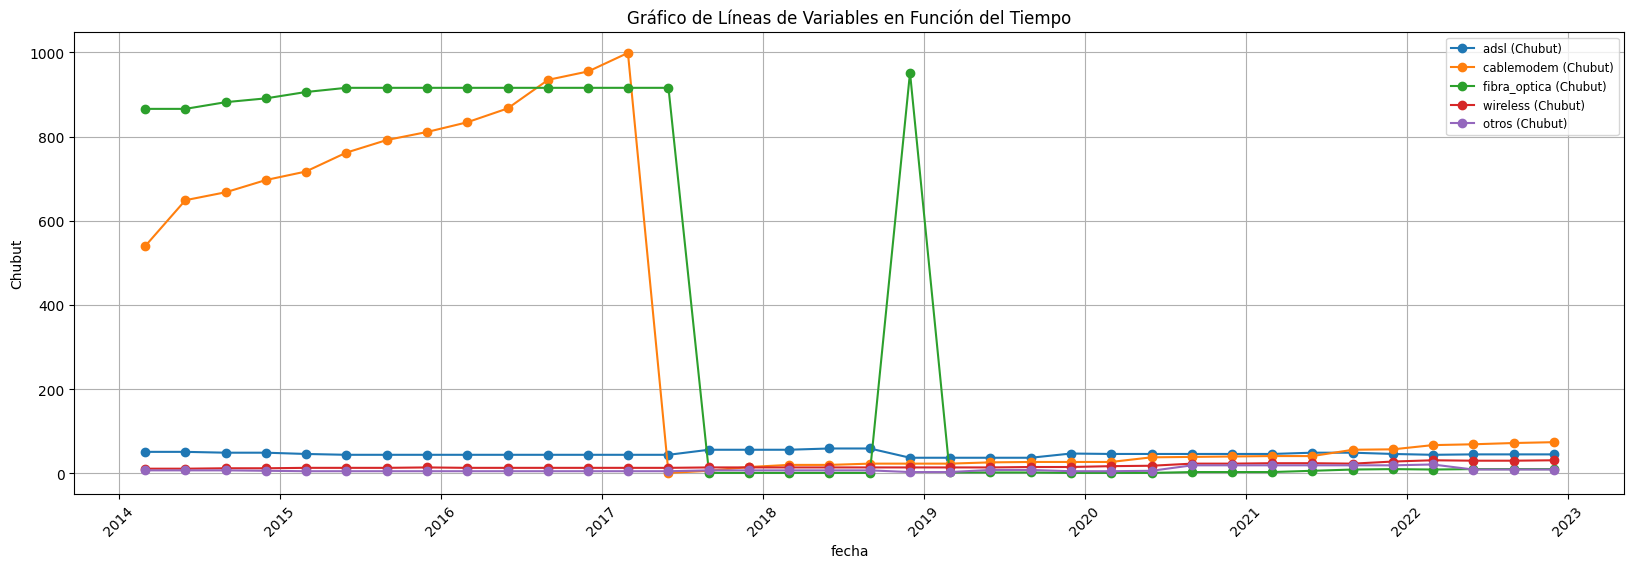

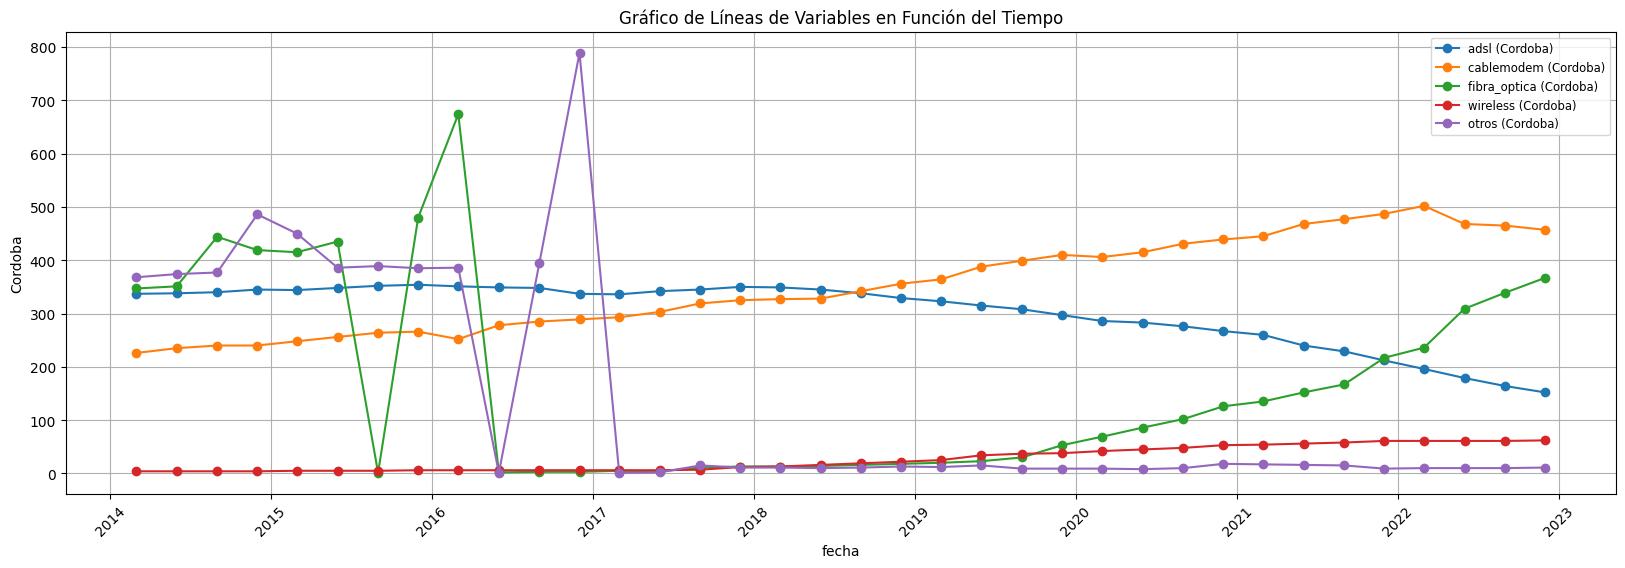

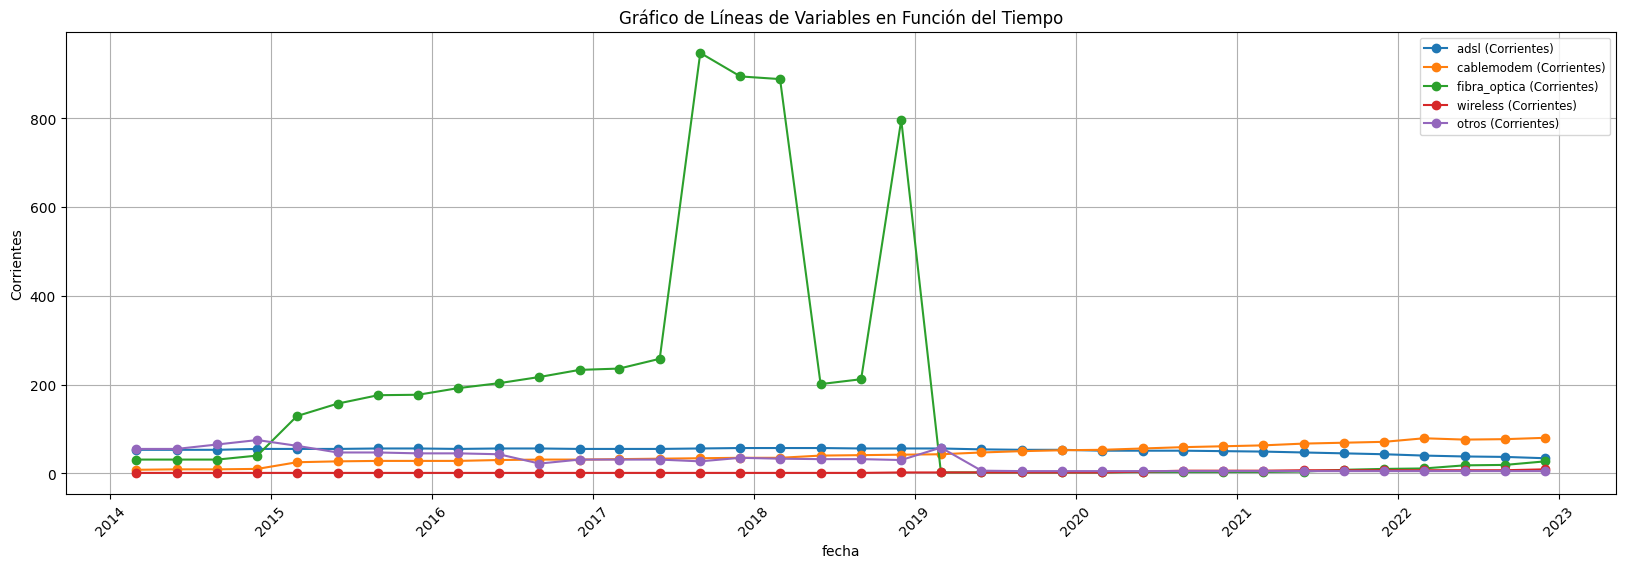

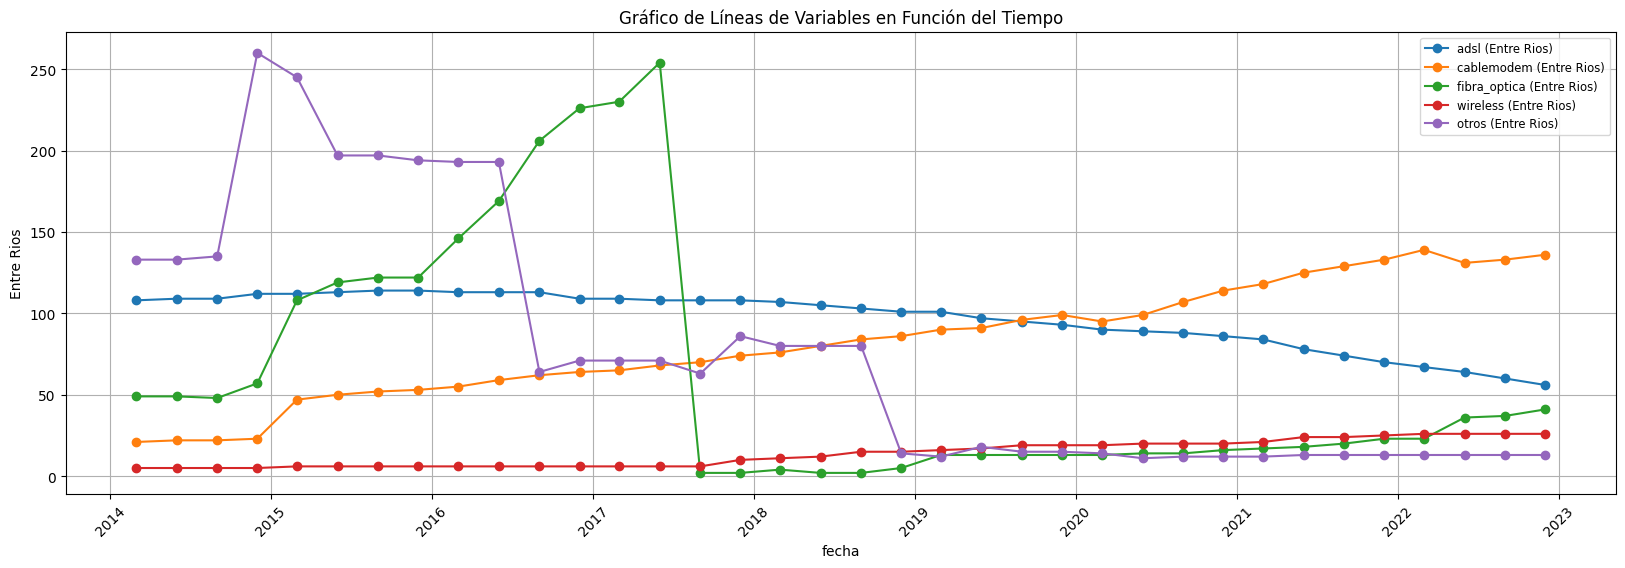

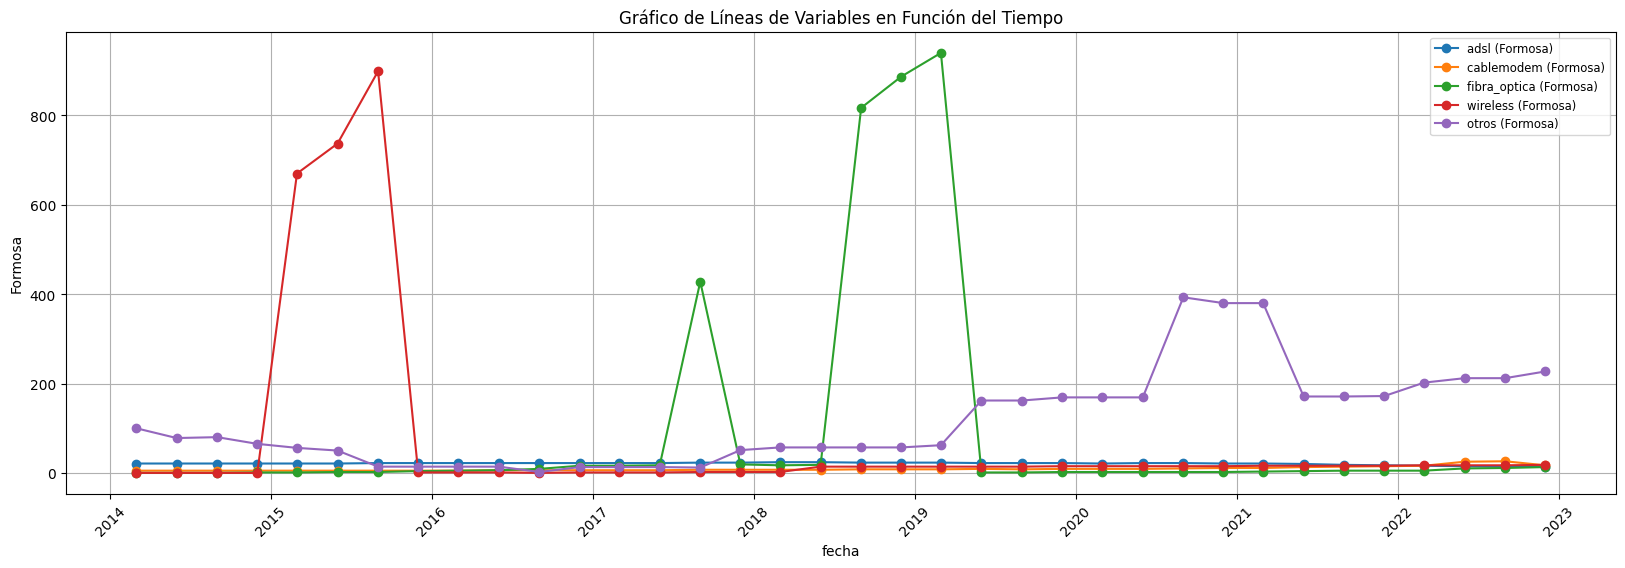

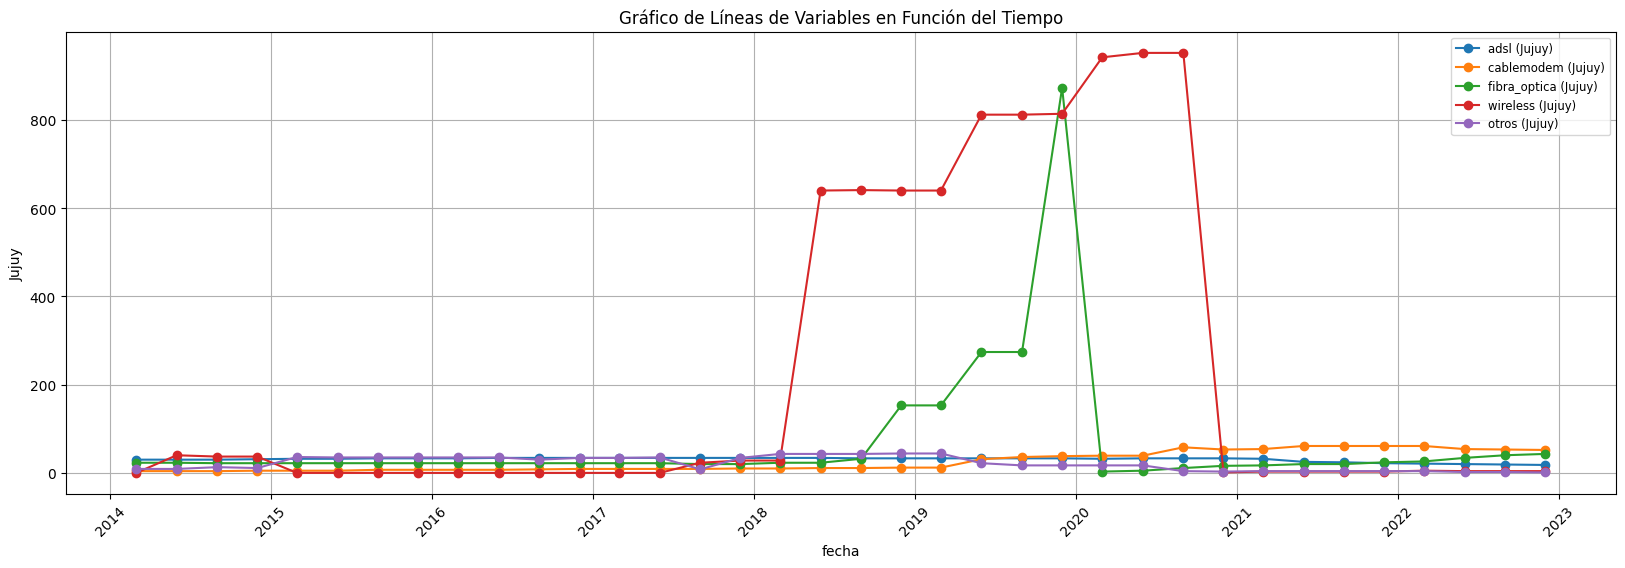

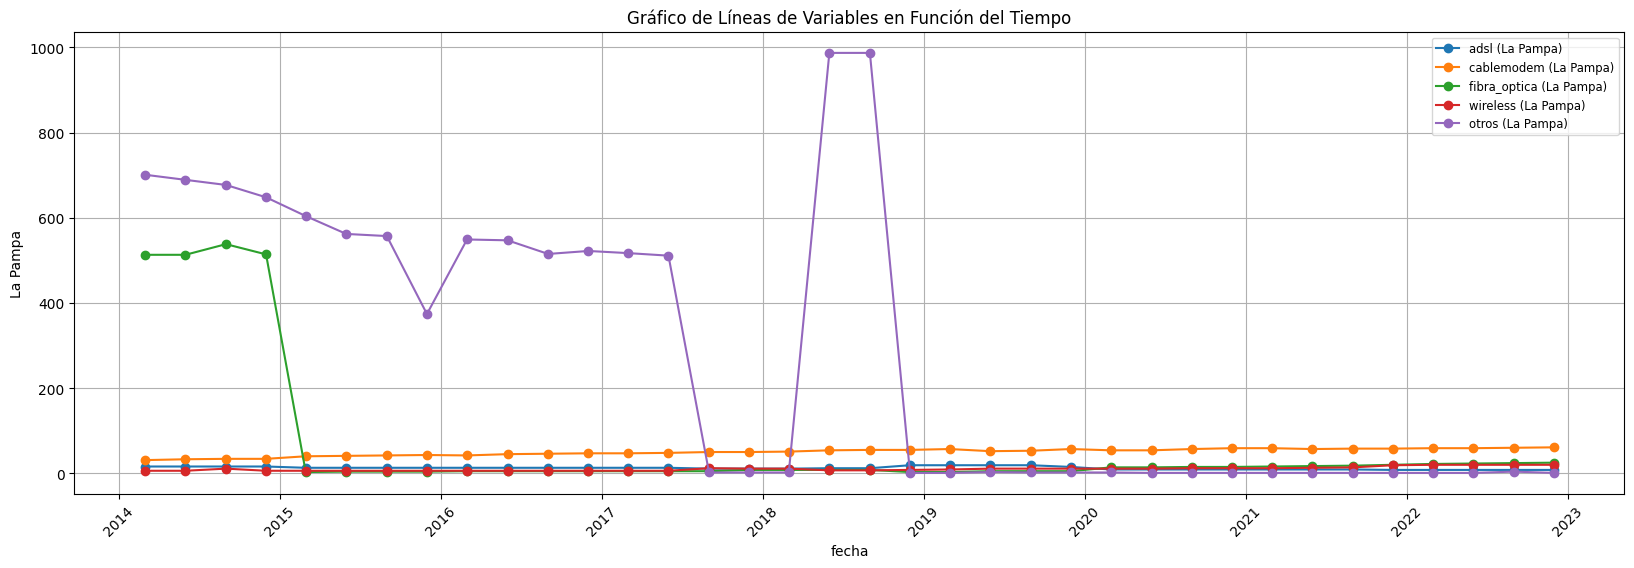

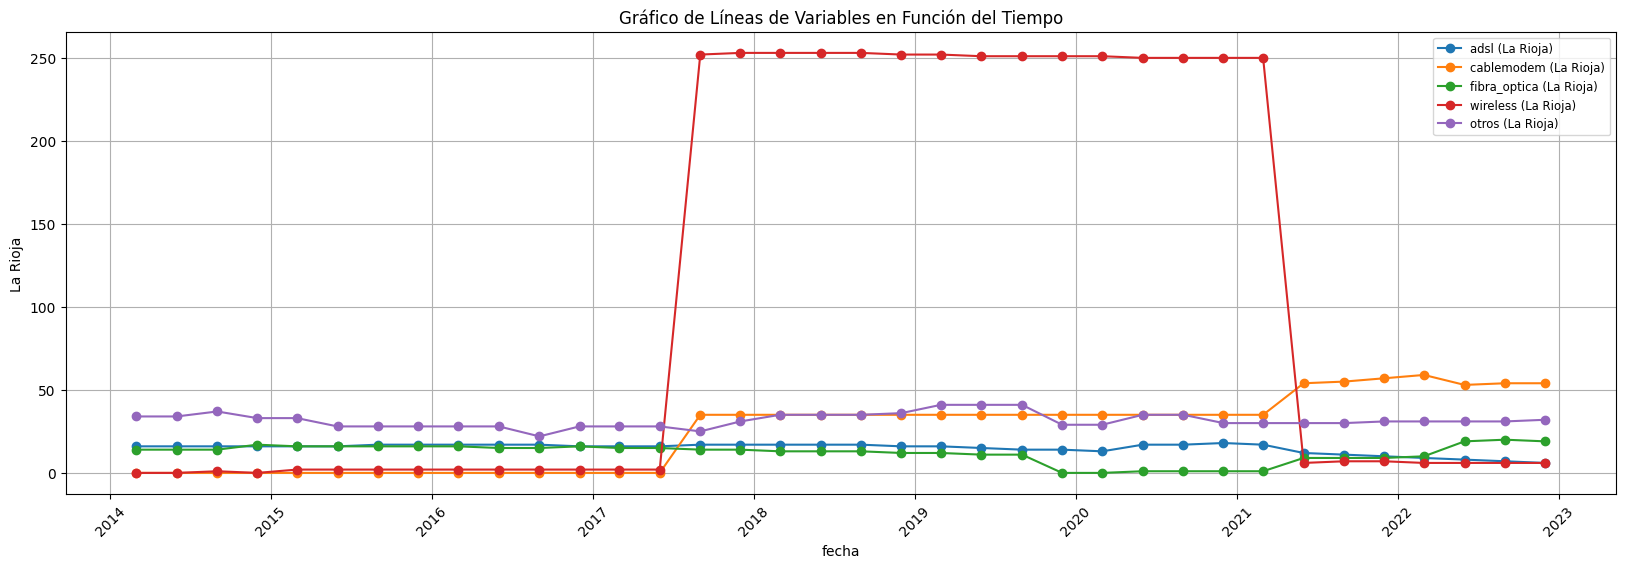

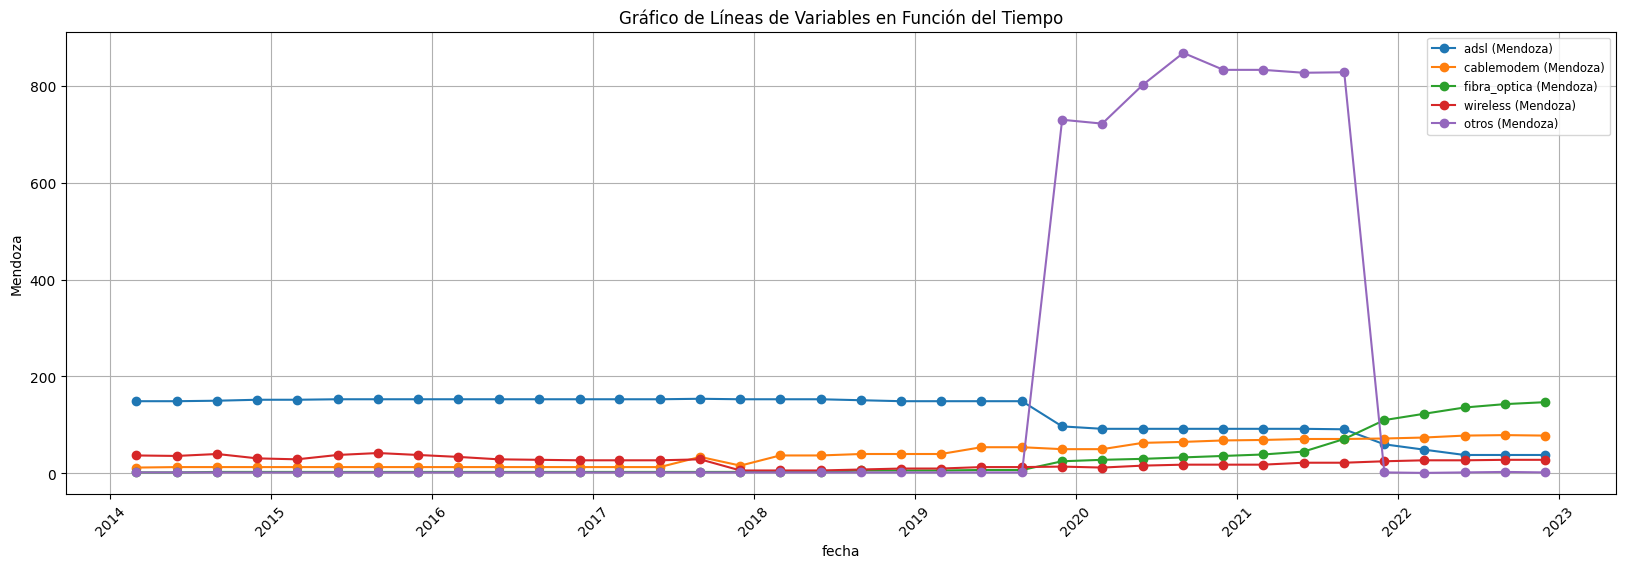

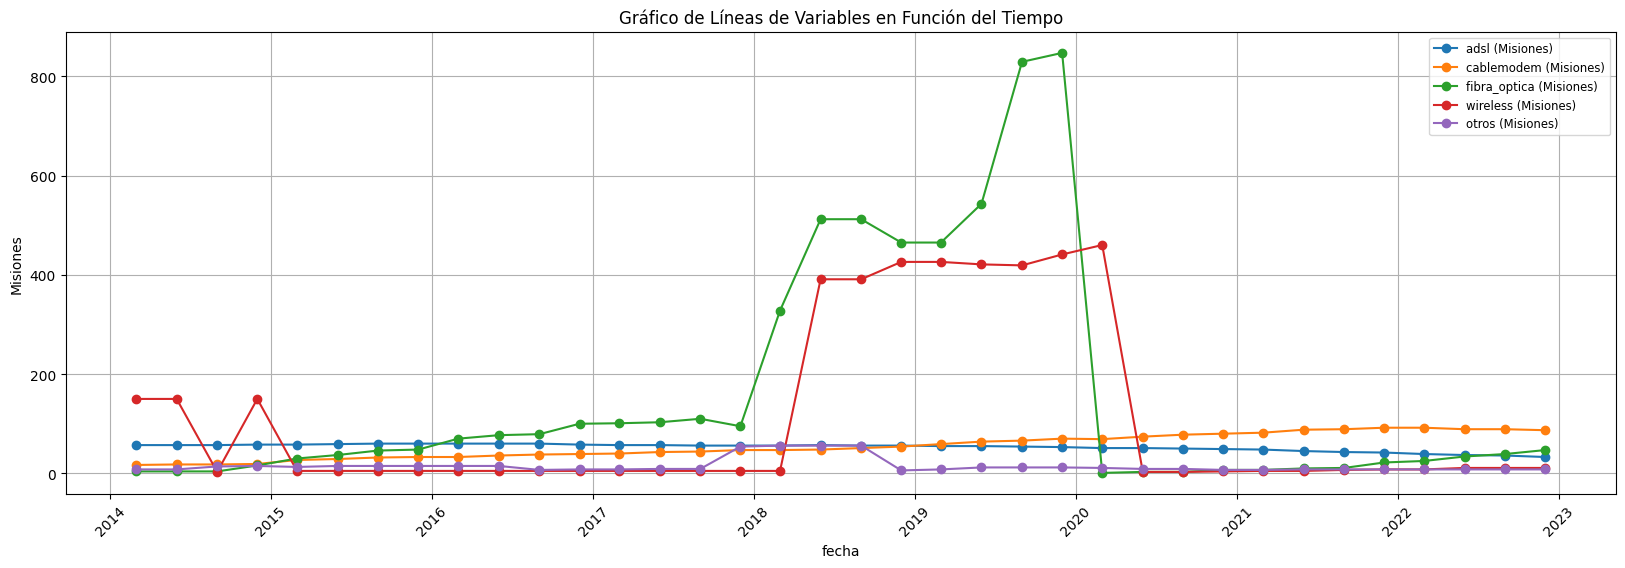

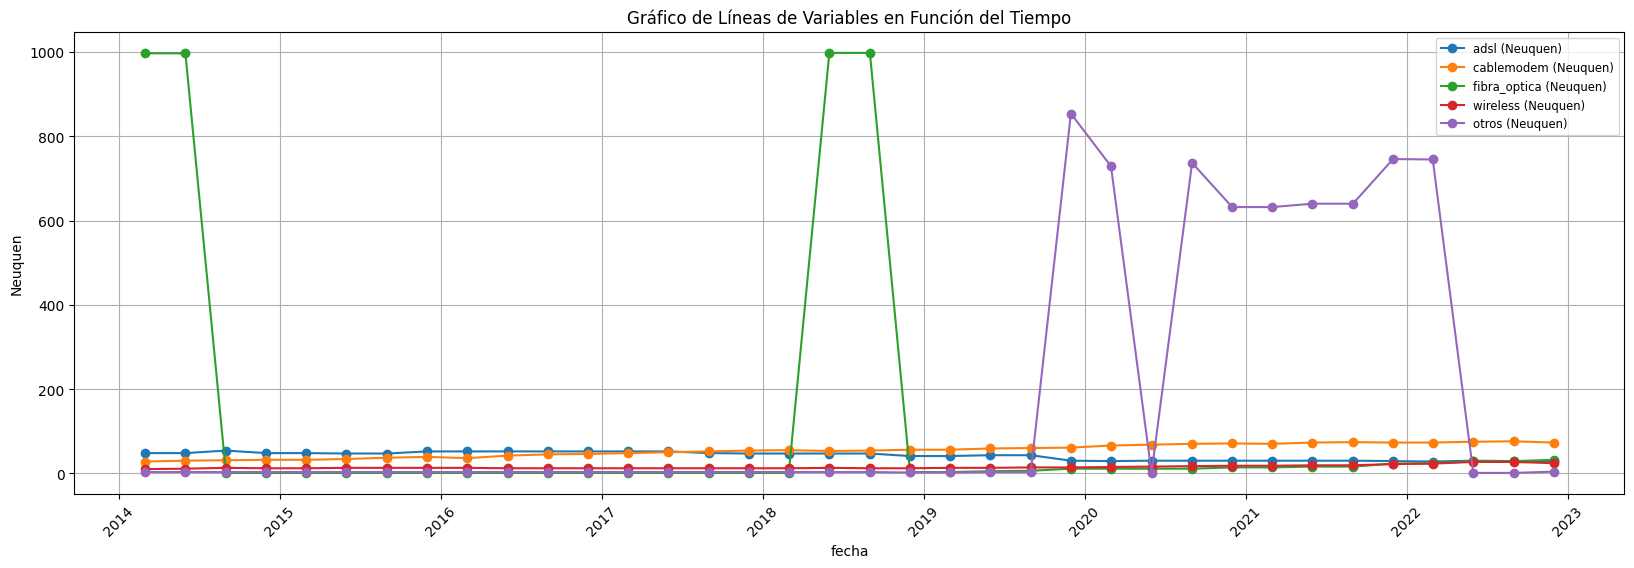

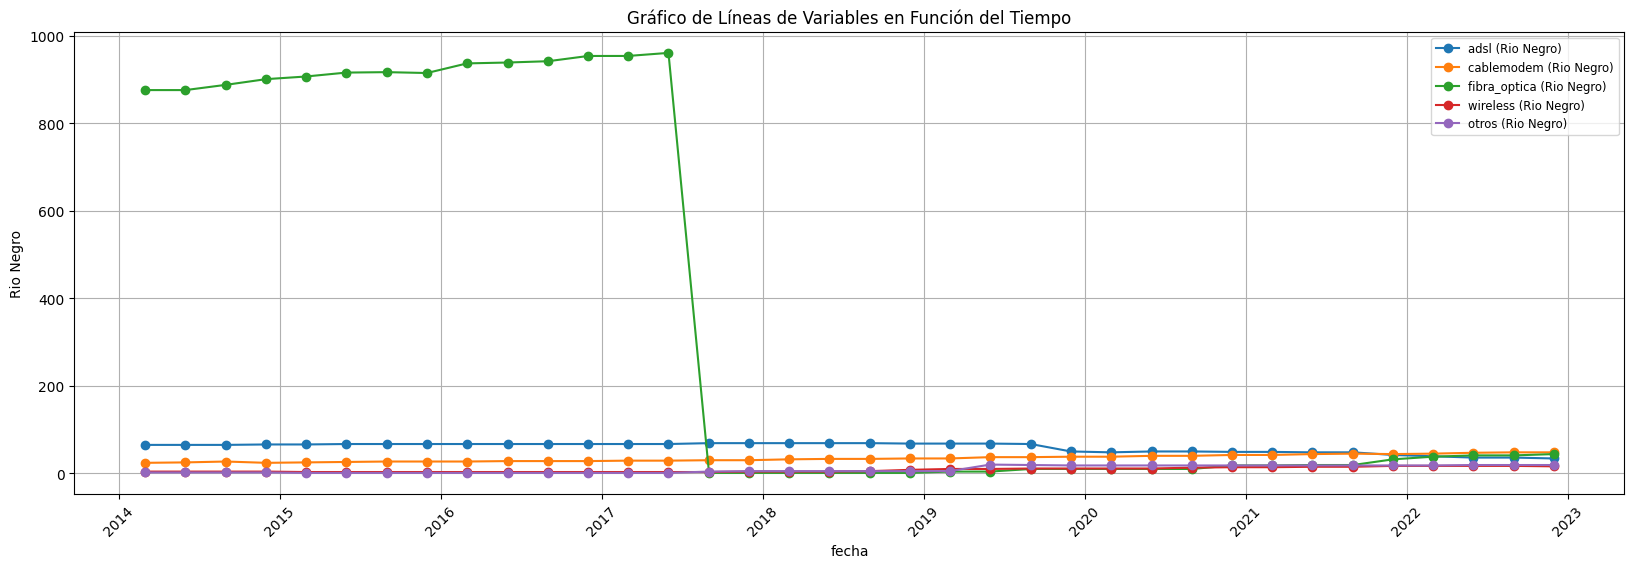

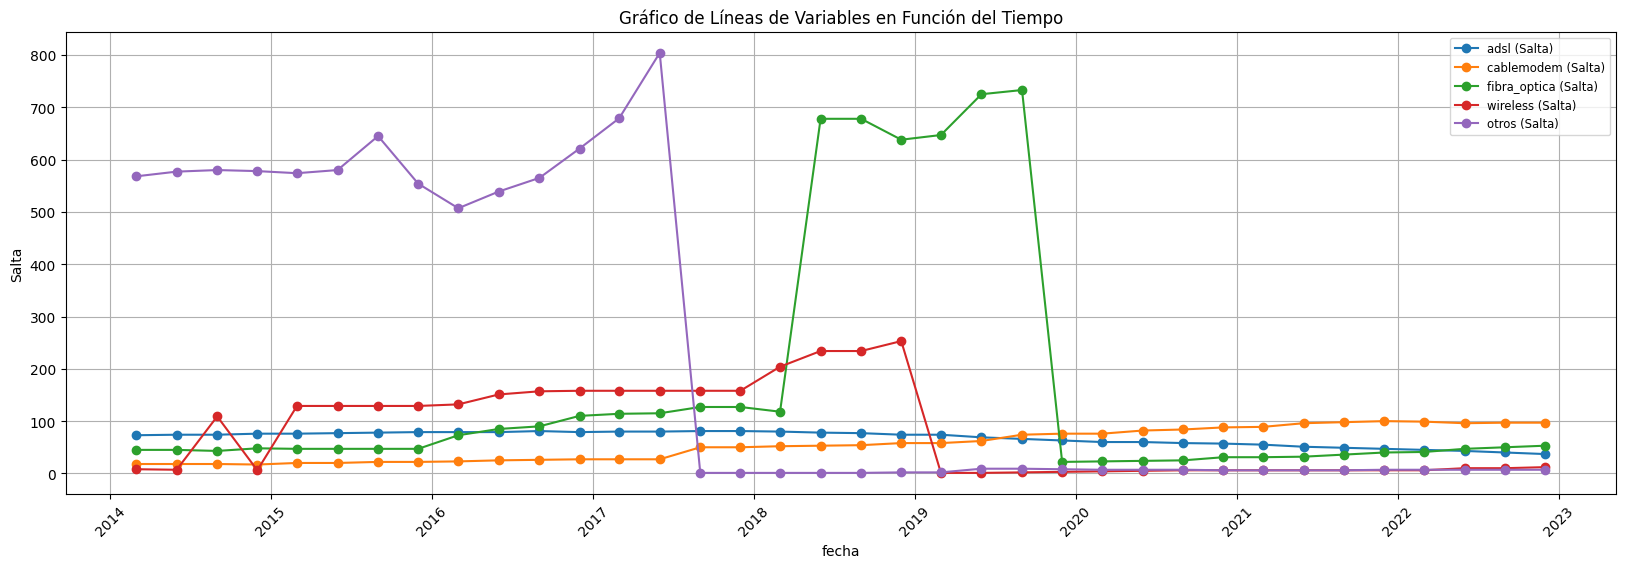

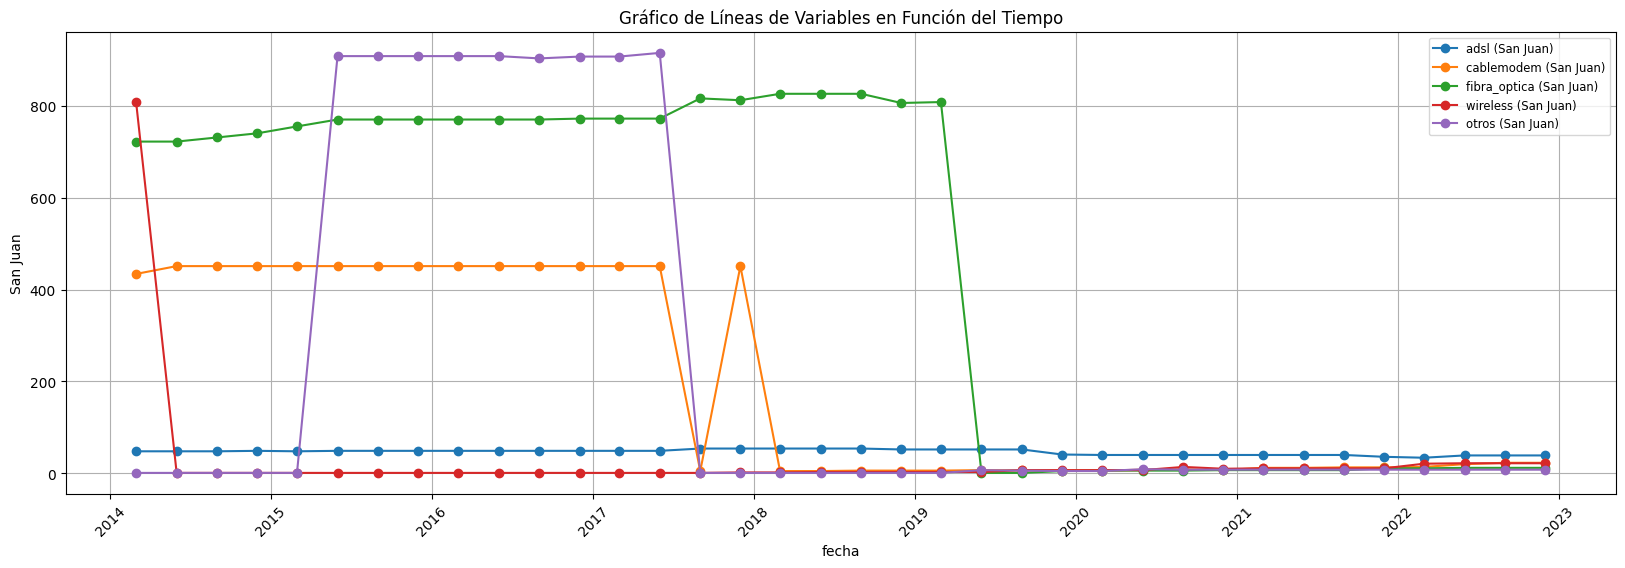

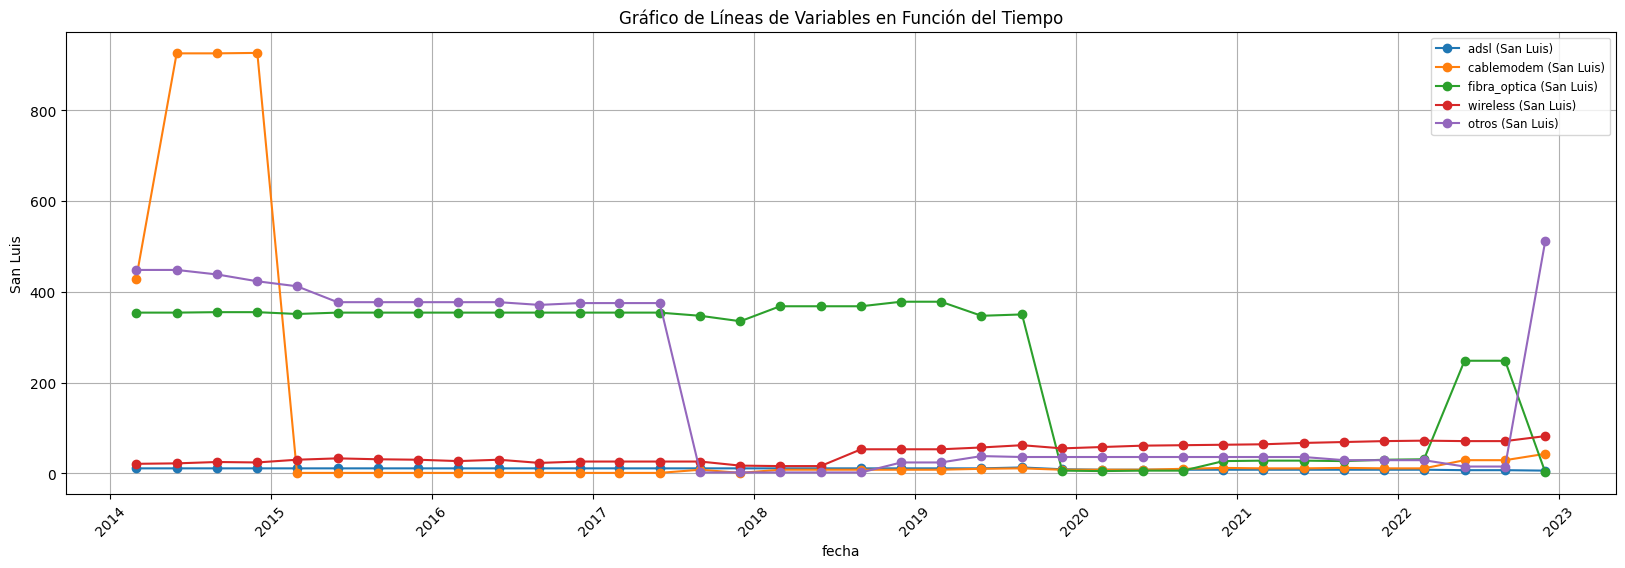

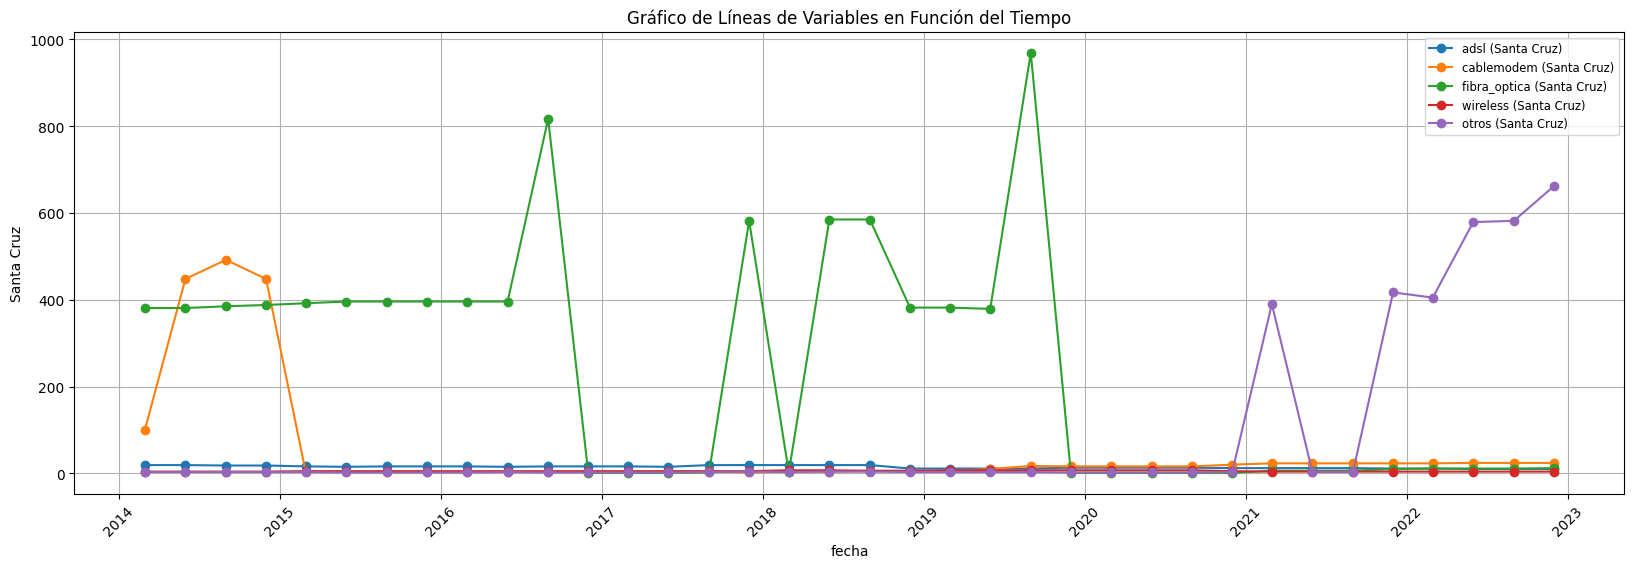

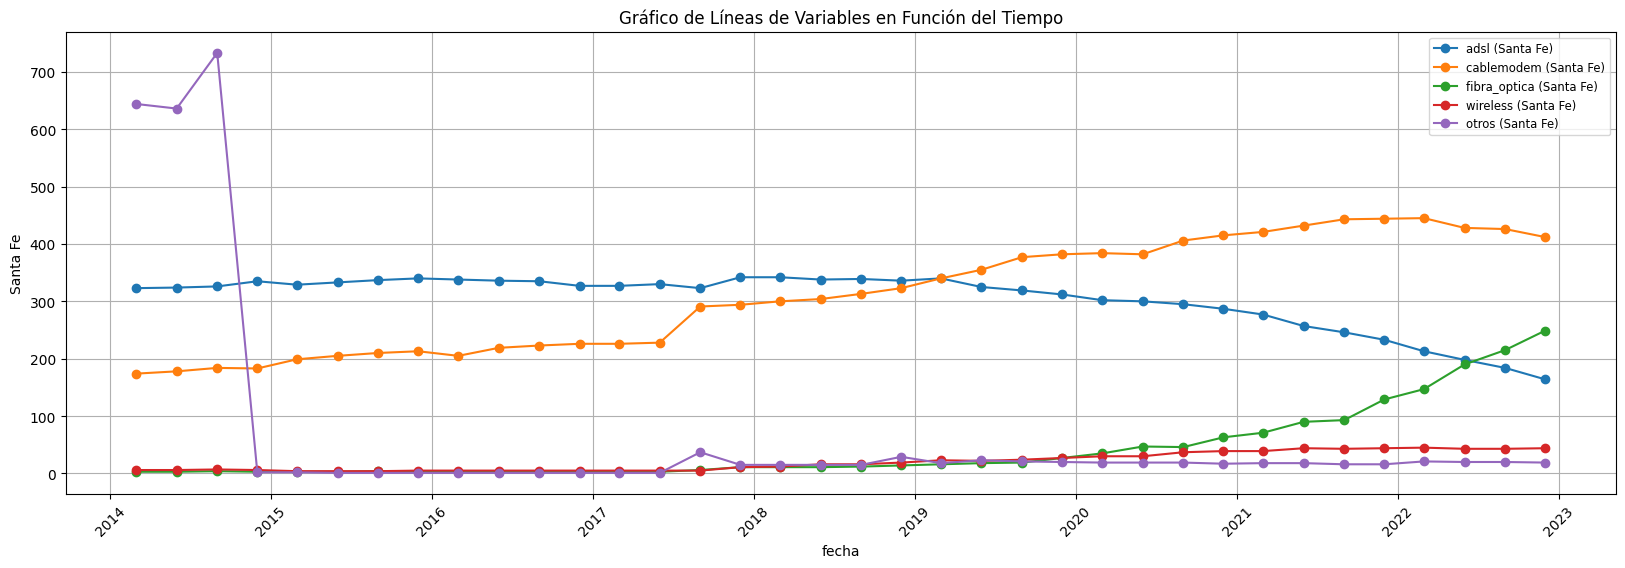

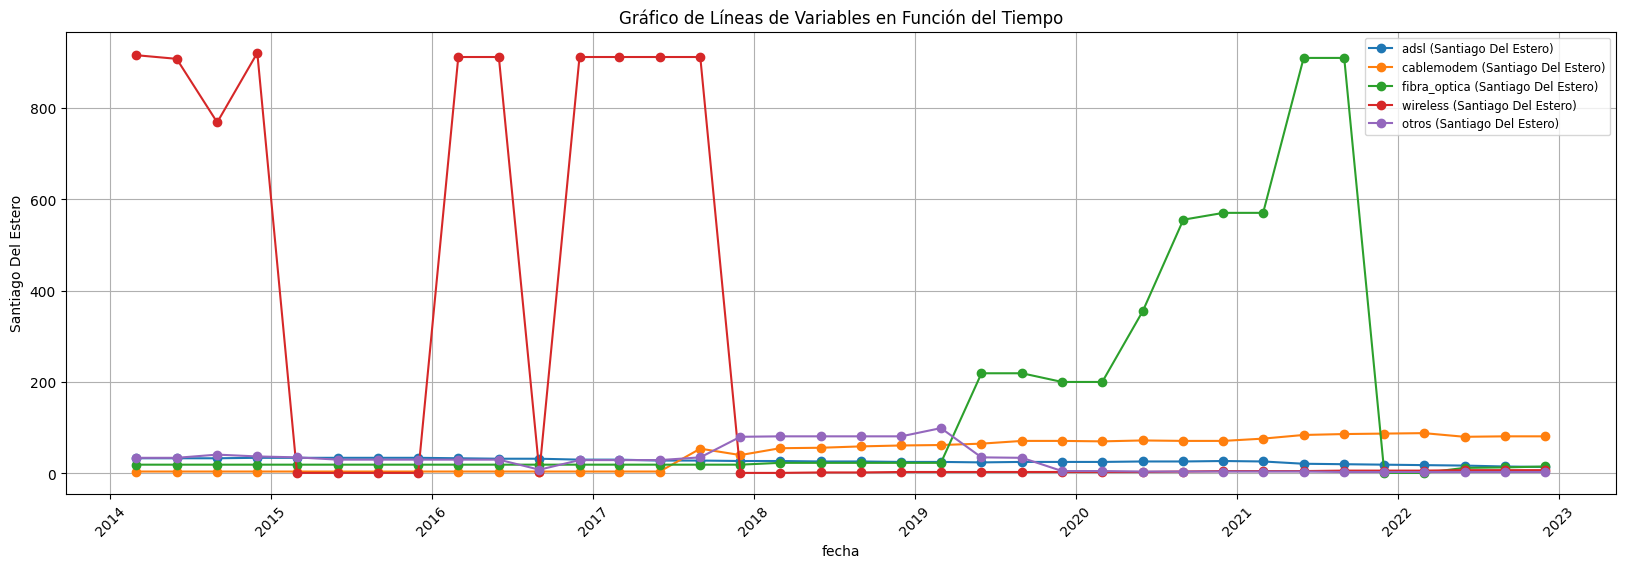

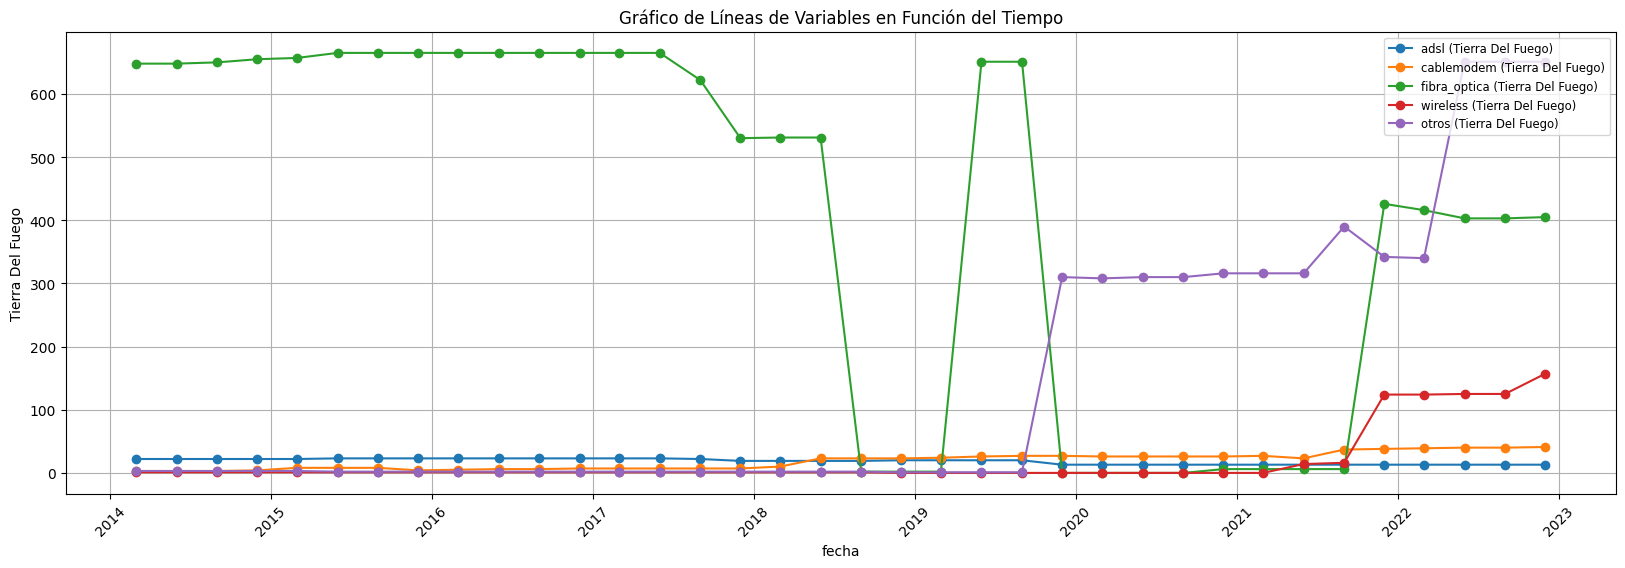

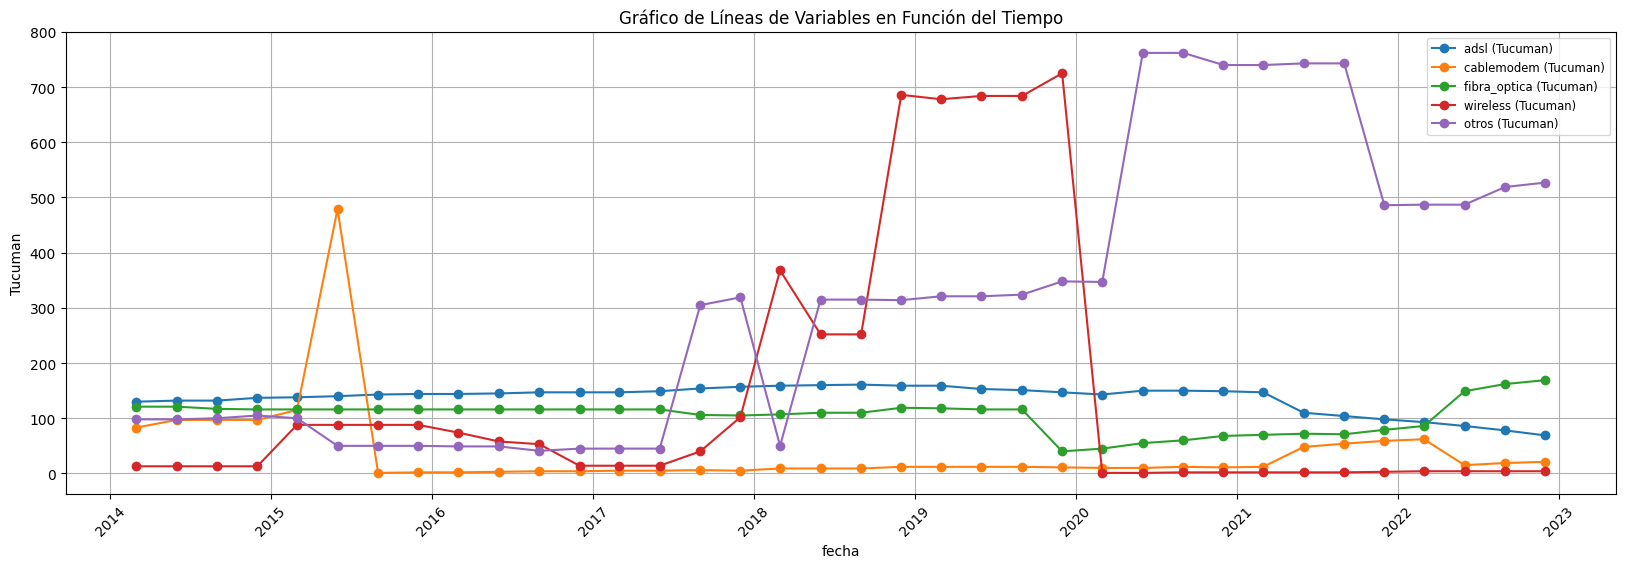

In [ ]:
graficar_columnas_en_funcion_del_tiempo(df, valor_columna, a_evaluar)

In [ ]:
corregir_outliers(df,valor_columna ,a_evaluar)

KeyError: 139